### Import packages

In [1]:
import sys
sys.path.append('../data_helpers/')
sys.path.append('../statistics/')
sys.path.append('../preprocess')
sys.path.append('../cluster/')

In [2]:
from twitter_data_helper import TwitterDataHelper
from reddit_data_helper import RedditDataHelper
from data_aggregator import DataAggregator
from statistics_aggregator import StatisticsAggregator
from text_cleaner import TextCleaner
from lda_cluster import LDACluster
from data_enhancer import DataOrganizer, SummarizeNER

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
import numpy as np
import pandas as pd
import json
import pickle
import datetime
from time import time, sleep
from tqdm import tqdm

In [4]:
try:
    if text_cleaner:
        pass
except:
    from text_cleaner import TextCleaner
    text_cleaner = TextCleaner(filter_sentiment_words=True)

* [TextCleaner] Initializing...
* [TextCleaner] Loading SpaCy "en_core_web_md" corpus...
* [TextCleaner] Loading stopwords...
* [TextCleaner] Loading sentinent words...
--------------------------------------------------------------------------------------------------------------------


In [5]:
from gensim.corpora import Dictionary

### Get data

In [56]:
def generate_dates_from_today(num_days):
    base = datetime.datetime.today()
    return [(base - datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(0, num_days)]

In [57]:
data_helper = DataAggregator()
date_range = generate_dates_from_today(3)
df = data_helper.get_data(date_range=date_range)

In [58]:
df['source'].value_counts()

twitter    278
reddit     100
Name: source, dtype: int64

In [59]:
df[['source', 'created_at', 'author', 'text', 'url']]

,source,created_at,author,text,url
0,twitter,2017-09-14 21:33:17,allisondlinn,Great read on the broader implications of this...,https://twitter.com/stevep2007/status/90838078...
1,twitter,2017-09-14 15:23:50,allisondlinn,Great example of years of cybersecurity resear...,https://twitter.com/markrussinovich/status/908...
2,twitter,2017-09-14 15:12:30,allisondlinn,Microsoft adds cloud security to keep out hack...,https://www.bloomberg.com/news/articles/2017-0...
3,twitter,2017-09-14 13:29:18,allisondlinn,Microsoft Pix uses AI to make those pictues yo...,https://twitter.com/i/web/status/9083217617368...
4,twitter,2017-09-16 00:28:20,AndrewYNg,We had ~120 persons apply in the first 24 hour...,http://deeplearning.ai/careers
5,twitter,2017-09-14 23:41:20,arxiv_cscl,Affective Neural Response Generation https://t...,http://arxiv.org/abs/1709.03968
6,twitter,2017-09-14 23:41:20,arxiv_cscl,A Review of Evaluation Techniques for Social D...,http://arxiv.org/abs/1709.04409
7,twitter,2017-09-14 23:41:19,arxiv_cscl,Natural Language Inference over Interaction Sp...,http://arxiv.org/abs/1709.04348
8,twitter,2017-09-14 23:41:18,arxiv_cscl,Assessing State-of-the-Art Sentiment Models on...,http://arxiv.org/abs/1709.04219
9,twitter,2017-09-14 22:41:32,arxiv_cscl,StarSpace: Embed All The Things! https://t.co/...,http://arxiv.org/abs/1709.03856


### Clean text

In [60]:
texts = df['text']

In [61]:
text_cleaner.token_blacklist.append('oc')
docs = text_cleaner.clean(texts)

0it [00:00, ?it/s]

* [TextCleaner] Cleaning text...


378it [00:03, 106.70it/s]


### Word Cloud (Show Top K words)
- K = vocabulary numbers / 2

In [62]:
from gensim.corpora import Dictionary
vocab = Dictionary(docs)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=int(len(vocab)*0.5), background_color='white', width=600, height=300, max_font_size=50).generate(' '.join([' '.join(doc) for doc in docs]))

(-0.5, 599.5, 299.5, -0.5)

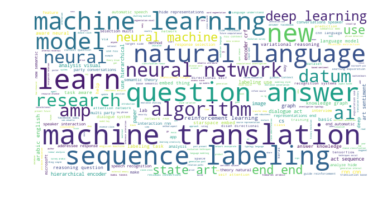

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## LDA - Topic Clustering

In [64]:
cluster = LDACluster(num_topics=10)
cluster.fit(docs)
cluster.model.print_topics()

* [LDA] Training model...


[(0,
  '0.025*"translation" + 0.023*"use" + 0.022*"machine" + 0.017*"machine_translation" + 0.017*"relation" + 0.017*"english" + 0.017*"arabic_english" + 0.017*"arabic" + 0.016*"dialogue" + 0.016*"sequence"'),
 (1,
  '0.022*"learn" + 0.018*"networks" + 0.018*"datum" + 0.013*"use" + 0.013*"neural" + 0.010*"research" + 0.010*"response" + 0.010*"help" + 0.009*"tensorflow" + 0.009*"science"'),
 (2,
  '0.020*"use" + 0.015*"tensorflow" + 0.013*"learning" + 0.011*"prediction" + 0.011*"time" + 0.010*"learn" + 0.009*"amp" + 0.009*"model" + 0.009*"microsoft" + 0.008*"image"'),
 (3,
  '0.025*"machine" + 0.023*"learning" + 0.022*"end" + 0.015*"interaction" + 0.015*"emotional" + 0.012*"response" + 0.011*"systems" + 0.011*"rnn" + 0.011*"analyze" + 0.011*"representations"'),
 (4,
  '0.041*"neural" + 0.023*"embed" + 0.022*"new" + 0.021*"theory" + 0.020*"machine" + 0.019*"translation" + 0.019*"machine_translation" + 0.017*"deep" + 0.016*"learning" + 0.015*"networks"'),
 (5,
  '0.017*"ai" + 0.014*"open"

### Topic distribution

In [65]:
df['cluster'] = cluster.labels
df['cluster'].value_counts()

6    52
4    48
0    44
9    43
7    42
3    41
1    34
5    31
8    24
2    19
Name: cluster, dtype: int64

### Post type distribution

In [66]:
stats_helper = StatisticsAggregator(df)
sdf = stats_helper.get_stats()

In [67]:
sdf['type'].value_counts()

paper                                 180
unknown link                           66
twitter status                         32
subreddit: /r/MachineLearning          27
blog                                   16
image                                  10
subreddit: /r/datascience               9
subreddit: /r/MLQuestions               7
subreddit: /r/learnmachinelearning      7
news                                    5
shortened-link                          5
code                                    4
subreddit: /r/computervision            3
tutorial                                2
dataset                                 2
social-media                            2
subreddit: /r/LanguageTechnology        1
Name: type, dtype: int64

### Cross relation between post type and post sentiment

In [68]:
pd.crosstab(sdf.type,sdf.sentiment)

sentiment,neg,neu,pos
type,,,
blog,0,13,3
code,0,4,0
dataset,0,2,0
image,0,10,0
news,0,5,0
paper,1,174,5
shortened-link,0,3,2
social-media,0,1,1
subreddit: /r/LanguageTechnology,0,1,0


### Blog

In [69]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'blog'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-16
* Text: 66% of Twitter conversation about Mario's nipples was from male authors, 34% female [OC]
* Link: https://www.brandwatch.com/blog/react-marios-nipples/?utm_source=reddit&utm_medium=react&utm_term=blog&utm_campaign=09_2017_entertainment_blog
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: A short tale of rent prices in America [OC]
* Link: https://bitbybit.benrudolph.com/blog/2017/09/15/cities/
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: [R] Analysis of algorithms from DAVIS-2017 Object Segmentation Challenge
* Link: https://medium.com/mlreview/a-meta-analysis-of-davis-2017-video-object-segmentation-challenge-c438790b3b56
------------------------------------------------------------------------------------------
* Date: 2017-09-15 17:00:47
* Text: .@kdubovikov solidly shares the basics of probability theory. Great, quick

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Code

In [70]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'code'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-16
* Text: [P] Built a scraper for NIPS 2017 paper abstracts, here's the database dump
* Link: https://github.com/JasonBenn/nips-scraper/
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: [P] Squeeze-and-Excitation Networks Tensorflow Implementation (ILSVRC 2017 winner)
* Link: https://github.com/taki0112/SENet-Tensorflow
------------------------------------------------------------------------------------------
* Date: 2017-09-15
* Text: [N] NIPS Workshop on Machine Learning for Creativity and Design
* Link: https://nips2017creativity.github.io
------------------------------------------------------------------------------------------
* Date: 2017-09-15
* Text: PyTorch Implementation of Deep Semantic Similarity Model(Microsoft Research)
* Link: https://github.com/nishnik/Deep-Semantic-Similarity-Model-PyTorch
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### News

In [71]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'news'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-16
* Text: 31 veterans lost to suicide: backgrounds, causes
* Link: https://beta.theglobeandmail.com/news/investigations/remembering-31-canadian-afghanistan-war-veterans-lost-to-suicide/article32657290/?ref=http://www.theglobeandmail.com&#data
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: A tale of two Canadas: Where you grow up affects your income in adulthood (Intergenerational Income Mobility by Region)
* Link: https://beta.theglobeandmail.com/news/national/a-tale-of-two-canadas-where-you-grow-up-affects-your-adult-income/article35444594/?ref=https://www.theglobeandmail.com
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: How health-care reform affected America, in 51 graphs
* Link: https://www.washingtonpost.com/news/politics/wp/2017/09/14/how-health-care-reform-affected-america-in-51-graphs/?utm_term=.d24c4472f69d
------------

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Paper

In [72]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'paper'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-16
* Text: [R] [1701.01833] Oriented Response Networks
* Link: https://arxiv.org/abs/1701.01833
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: [R] An Empirical Study of AI Population Dynamics with Million-agent Reinforcement Learning
* Link: https://arxiv.org/abs/1709.04511
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: Stanford NLP release TACRED: a supervised dataset for relation extraction (120k examples)
* Link: https://nlp.stanford.edu/pubs/zhang2017tacred.pdf?utm_content=60249707&utm_medium=social&utm_source=twitter
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: [Research] Deep Physiological Arousal Detection in a Driving Simulator
* Link: http://essay.utwente.nl/73268/1/saeed_MS_EEMCS.pdf
------------------------------------------------------------------

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Tutorial

In [73]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'tutorial'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-15
* Text: Here is an episode of Data podcast, interviewing Gregory Piatetsky-Shapiro on topics of Big Data and Data Science
* Link: https://www.youtube.com/watch?v=8zGk-eKy3qs&t=1s
------------------------------------------------------------------------------------------
* Date: 2017-09-14 09:02:01
* Text: Convolutional Networks for Text by @gneubig 

Lecture for CMU CS, Neural Networks for NLP

https://t.co/EZO9RKh5CX #MachineLearning
* Link: https://www.youtube.com/watch?v=vnzKAhs7nds&feature=youtu.be
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Image

In [74]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'image'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-16
* Text: Countries with a greater population than that of the Indian province of Uttar Pradesh, which is roughly the size of Texas (240,000 square miles) [OC]
* Link: https://i.redd.it/76yrxp8do6mz.jpg
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: Percentage of local Chinese officials who are originally from the same province they currently hold positions in [OC]
* Link: https://i.redd.it/28eyrfx3k6mz.png
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: Bangladesh accepts nearly as many refugees as Germany did in past 2.5 years [OC]
* Link: https://i.redd.it/yufc8iijc2mz.png
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: [OC] Comparing research-grade air quality instruments (DEQ) with low-cost sensors (Apis) during the summer of 2017.
* Link: https://i.redd.it

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Sentiment Distribution

In [75]:
sdf['sentiment'].value_counts()

neu    345
pos     29
neg      4
Name: sentiment, dtype: int64

### Positive posts

In [76]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'pos'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


* Date: 2017-09-15 17:22:34
* Text: Happy domain-iversary! Celebrating 20 years since we registered https://t.co/ePnBWEpWpj with a whooole lot of o's. https://t.co/FQh30rSDDk
* Link: http://google.com
------------------------------------------------------------------------------------------
* Date: 2017-09-16 00:28:20
* Text: We had ~120 persons apply in the first 24 hours, and total of ~270 by 48 hours. Wow! https://t.co/1sT22MyzZw
* Link: http://deeplearning.ai/careers
------------------------------------------------------------------------------------------
* Date: 2017-09-15 23:16:43
* Text: Did someone say dinner party? Let your #GoogleAssistant be the perfect co-host to help you prepare.

https://t.co/KuDcPeQW3T
* Link: https://cards.twitter.com/cards/c85st/4sp2q
------------------------------------------------------------------------------------------
* Date: 2017-09-15 20:35:30
* Text: In this week's photos, #teampixel shows off their soft side with cool hues and calm scenes → 

### Negative posts

In [77]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'neg'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-15 19:01:56
* Text: The hi-res future of anti-pollution tech: how #StreetView cars are mapping the way to cleaner air, block by block →… https://t.co/eY4NQ1GY6E
* Link: https://twitter.com/i/web/status/908767858619973632
------------------------------------------------------------------------------------------
* Date: 2017-09-15 09:56:06
* Text: Conditional GAN learns to an extent and then destroys what it has learnt https://t.co/stFs9fIzVx
* Link: http://dlvr.it/Pn8rK2
------------------------------------------------------------------------------------------
* Date: 2017-09-14 06:53:22
* Text: Umm... the "ML" here is likely just counting, but the needed logistics infrastructure seems insane. How will they r… https://t.co/bj7U68mzw2
* Link: https://twitter.com/i/web/status/908222119951126528
------------------------------------------------------------------------------------------
* Date: 2017-09-14 12:56:58
* Text: #AAAI2018 EAD: Elastic-Net Attacks to Deep Neural Netw

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### All posts ranked by "hotness"

In [78]:
for i, row in sdf.sort_values('hotness', ascending=False).iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-09-16
* Text: 66% of Twitter conversation about Mario's nipples was from male authors, 34% female [OC]
* Link: https://www.brandwatch.com/blog/react-marios-nipples/?utm_source=reddit&utm_medium=react&utm_term=blog&utm_campaign=09_2017_entertainment_blog
------------------------------------------------------------------------------------------
* Date: 2017-09-15 18:13:03
* Text: Melinda and I have always believed that where a child is born shouldn’t determine his or her future. https://t.co/M029d11mGg
* Link: http://b-gat.es/2wvaVpM
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: [N] Google launches TensorBoard API to enhance machine learning visualizations
* Link: https://venturebeat.com/2017/09/11/google-launches-tensorboard-api-to-enhance-machine-learning-visualizations/
------------------------------------------------------------------------------------------
* Date: 2017-09-15 17:22:34
* Text: Happy 

* Date: 2017-09-16
* Text: [R] [1701.01833] Oriented Response Networks
* Link: https://arxiv.org/abs/1701.01833
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: The Simpsons by the numbers | data-viz app allowing you to explore 26 seasons of data behind the series & your favorite characters [OC]
* Link: http://www.thesimpsonsbtn.com
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: Noob help? What to do with edges once detected?
* Link: https://www.reddit.com/r/computervision/comments/70ck37/noob_help_what_to_do_with_edges_once_detected/
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: Looking for a guide
* Link: https://www.reddit.com/r/MachineLearning/comments/70f5fi/looking_for_a_guide/
------------------------------------------------------------------------------------------
* Da

------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: Precise Spherical Stitching from Homography Computation?
* Link: https://www.reddit.com/r/computervision/comments/70a5vm/precise_spherical_stitching_from_homography/
------------------------------------------------------------------------------------------
* Date: 2017-09-16
* Text: [D] In GAN evaluation, how are inception scores calculated for non-ImageNet datasets ?
* Link: https://www.reddit.com/r/MachineLearning/comments/70b07q/d_in_gan_evaluation_how_are_inception_scores/
------------------------------------------------------------------------------------------
* Date: 2017-09-16 01:16:34
* Text: [Research] Deep Physiological Arousal Detection in a Driving Simulator https://t.co/4wWx2kO5YD
* Link: http://dlvr.it/PnK70S
------------------------------------------------------------------------------------------
* Date: 2017-09-16 01:56:20
* Text: More pictures of the 

* Date: 2017-09-16 02:41:08
* Text: Simple Open Stance Classification for Rumour Analysis https://t.co/LG0q7a16Jd
* Link: http://arxiv.org/abs/1708.05286
------------------------------------------------------------------------------------------
* Date: 2017-09-16 02:41:07
* Text: Past, Present, Future: A Computational Investigation of the Typology of Tense in 1000 Languages https://t.co/QzKILya0tO
* Link: http://arxiv.org/abs/1704.08914
------------------------------------------------------------------------------------------
* Date: 2017-09-16 02:41:07
* Text: Neural Models for Key Phrase Detection and Question Generation https://t.co/6VHeYuwFcV
* Link: http://arxiv.org/abs/1706.04560
------------------------------------------------------------------------------------------
* Date: 2017-09-16 02:41:07
* Text: Guiding Reinforcement Learning Exploration Using Natural Language https://t.co/SQEB5us9vt
* Link: http://arxiv.org/abs/1707.08616
------------------------------------------------

* Link: http://tcrn.ch/2x1LEW6
------------------------------------------------------------------------------------------
* Date: 2017-09-14 01:06:54
* Text: Pix2Seq: Generate Sketches of Multiple Categories. Nice generative vector image experiments using QuickDraw dataset… https://t.co/n9U3ftWrUV
* Link: https://twitter.com/i/web/status/908134930692968448
------------------------------------------------------------------------------------------
* Date: 2017-09-14 16:13:08
* Text: Microsoft adds new #DataSecurity, keeping hackers, government, &amp; even itself from accessing @dinabass @technology… https://t.co/2XKypTnAIt
* Link: https://twitter.com/i/web/status/908362993288724480
------------------------------------------------------------------------------------------
* Date: 2017-09-15 08:26:57
* Text: #AAAI2018 Global-Context Neural Machine Translation through Target-Side Attentive Residual Connections. (... https://t.co/3wEgx8j65U
* Link: http://arxiv.org/abs/1709.04849
-----------

------------------------------------------------------------------------------------------
* Date: 2017-09-14 16:56:25
* Text: Jeff Dean on Brain's approach: broadest exploration of new ideas, researchers set own agendas, a focus on advancing… https://t.co/NMz1CBaRR0
* Link: https://twitter.com/i/web/status/908373885548036101
------------------------------------------------------------------------------------------
* Date: 2017-09-15 03:01:01
* Text: "A Brief Introduction to Machine Learning for Engineers" 206pp

https://t.co/PjzBwrMJ0R
* Link: https://arxiv.org/abs/1709.02840
------------------------------------------------------------------------------------------
* Date: 2017-09-15 02:41:32
* Text: A New Semantic Theory of Natural Language https://t.co/q1SjtP1K1d
* Link: http://arxiv.org/abs/1709.04857
------------------------------------------------------------------------------------------
* Date: 2017-09-15 02:41:31
* Text: Method for Aspect-Based Sentiment Annotation Using Rheto

## Extract keywords (name entities) from text

In [79]:
se = SummarizeNER(sdf)

In [80]:
for i, phrase in enumerate(se.cleaned_phrases):
    if type(phrase) == tuple and phrase != 'N/A':
        print(i, phrase[0])

1 Microsoft
2 Microsoft
3 Microsoft
6 Social Dialogue Systems
7 Natural Language Inference
12 Multi Party Conversations
13 Multi Party Conversations
16 Claim Cross Domain Claim Identification
17 Neural Network Based Nonlinear Weighted Finite Automata
18 Linguistic Features
24 Relation Networks for Neural Machine Translation
25 Affective Neural Response Generation
26 A Review of Evaluation Techniques for Social Dialogue Systems
27 Assessing State
28 Relation Networks for Neural Machine Translation
29 Addressee and Response Selection in Multi Party Conversations
30 Claim Cross Domain Claim Identification
31 Addressee and Response Selection in Multi Party Conversations
36 Claim Cross Domain Claim Identification
37 A Review of Evaluation Techniques for Social Dialogue Systems
38 Neural Network Based Nonlinear Weighted Finite Automata
39 Linguistic Features
46 Multi Party Conversations
47 Relation Networks for Neural Machine Translation
50 Facebook
66 CNN
68 Semantic Web
69 Robustness Analy